<a href="https://colab.research.google.com/github/hectorcamachoz/Proyecto_Redes_Neuronales_CNN/blob/main/P_P3_594557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Convolucionales

El objetivo de este proyecto es entrenar un modelo utilizando redes neuronales convolucionales para predecir el numero correcto dibujado en una imagen. Se espera que al finalizar el modelo pueda predecir un numero dibujado en tiempo real.

La base de datos utilizada se obtuvo de un drive generado por alumnos de la clase de Inteligencia Artifical.

1. Primero comenzare importando las imagenes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


# Preprocesamiento de las imágenes
datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/numeros_IA/Numbers/Train',               # Directorio de entrenamiento
    target_size=(280, 280),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',    # 20% de los datos serán usados para validación
    subset='training'              # La parte de entrenamiento
)
val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/numeros_IA/Numbers/Train',
    target_size=(280, 280),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'
)
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/numeros_IA/Numbers/Test',
    target_size=(280, 280),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)


Found 4293 images belonging to 10 classes.
Found 1069 images belonging to 10 classes.
Found 1457 images belonging to 10 classes.


In [6]:
from tensorflow.keras import layers, models

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(280, 280, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 278, 278, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 139, 139, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 137, 137, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 68, 68, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 66, 66, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 278784)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    17,842,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,899,210 (68.28 MB)

 Trainable params: 17,899,210 (68.28 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
history = model.fit(train_generator, epochs=20,validation_data= test_generator ,callbacks=[early_stopping])

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.9943 - loss: 0.0379 - val_accuracy: 0.7982 - val_loss: 2.0731
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 51s 380ms/step - accuracy: 0.9926 - loss: 0.0239 - val_accuracy: 0.8195 - val_loss: 1.9611
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 383ms/step - accuracy: 0.9981 - loss: 0.0049 - val_accuracy: 0.8209 - val_loss: 2.0015
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 51s 376ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 0.8202 - val_loss: 1.9139
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 53s 392ms/step - accuracy: 0.9979 - loss: 0.0056 - val_accuracy: 0.8291 - val_loss: 1.9867
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 51s 374ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.8229 - val_loss: 1.9250
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 84s 386ms/step - accuracy: 0.9986 - loss: 0.0031 - val_accuracy: 0.8209 - val_loss: 1.9012
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 52s 382ms/step - accuracy: 0.9990 - loss: 0.0

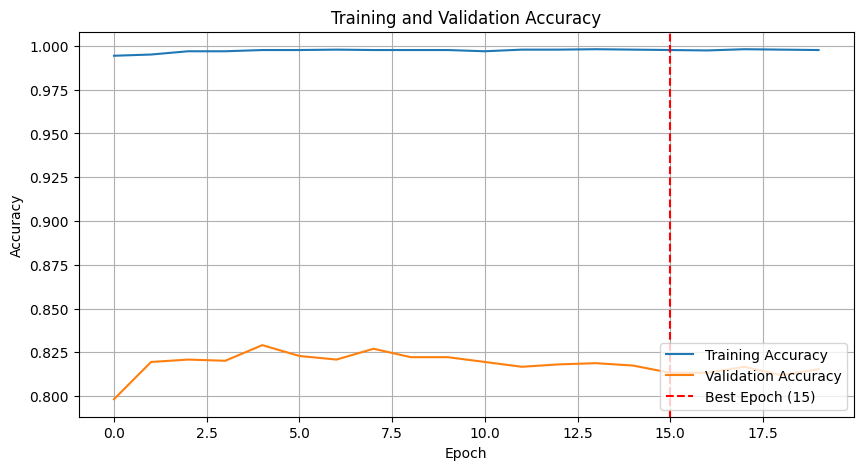

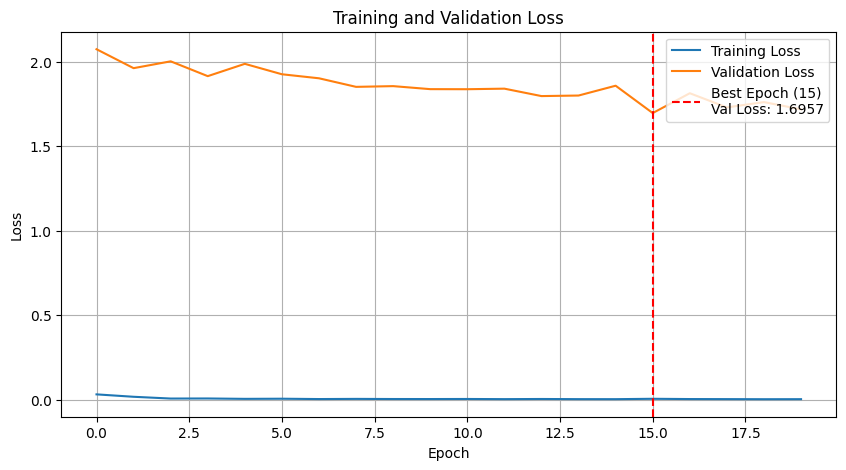

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que el historial tiene datos válidos
val_loss_list = history.history['val_loss']

# Encontrar el índice (época) donde la val_loss fue mínima
best_epoch = np.argmin(val_loss_list)
best_val_loss = val_loss_list[best_epoch]

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Línea vertical en la mejor época
plt.axvline(x=best_epoch, color='r', linestyle='--',
            label=f'Best Epoch ({best_epoch})\nVal Loss: {best_val_loss:.4f}')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [44]:
model.save("modelo_RP3_594557.h5")

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
def take_photo_2(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
             const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
             document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

<IPython.core.display.Javascript object>

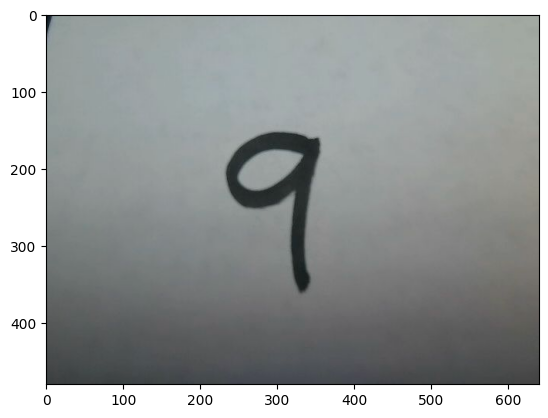

In [17]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

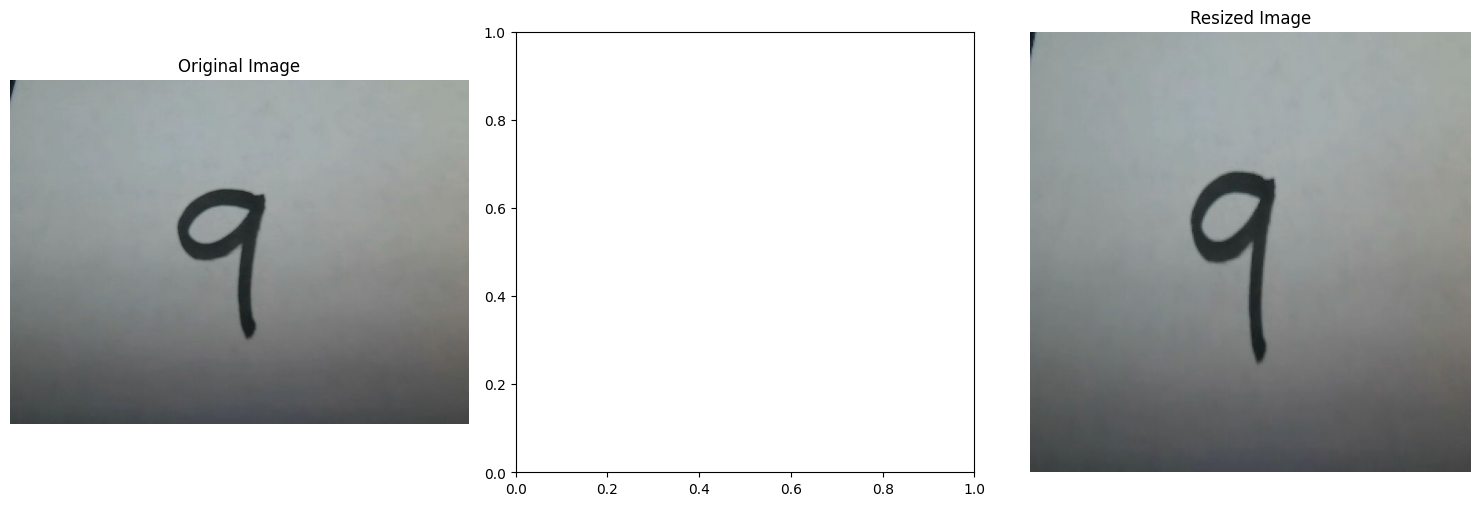

In [20]:

# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()


In [22]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   1.00000
The predicted digit is: 9


<IPython.core.display.Javascript object>

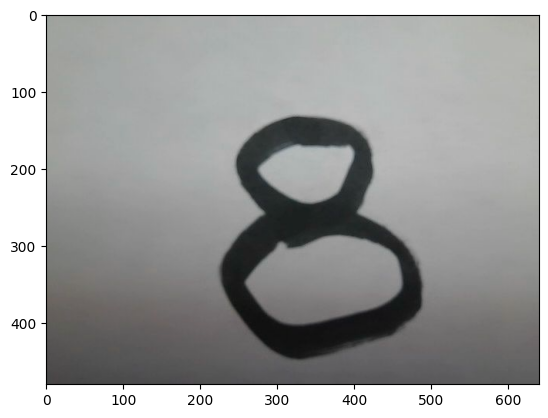

In [23]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

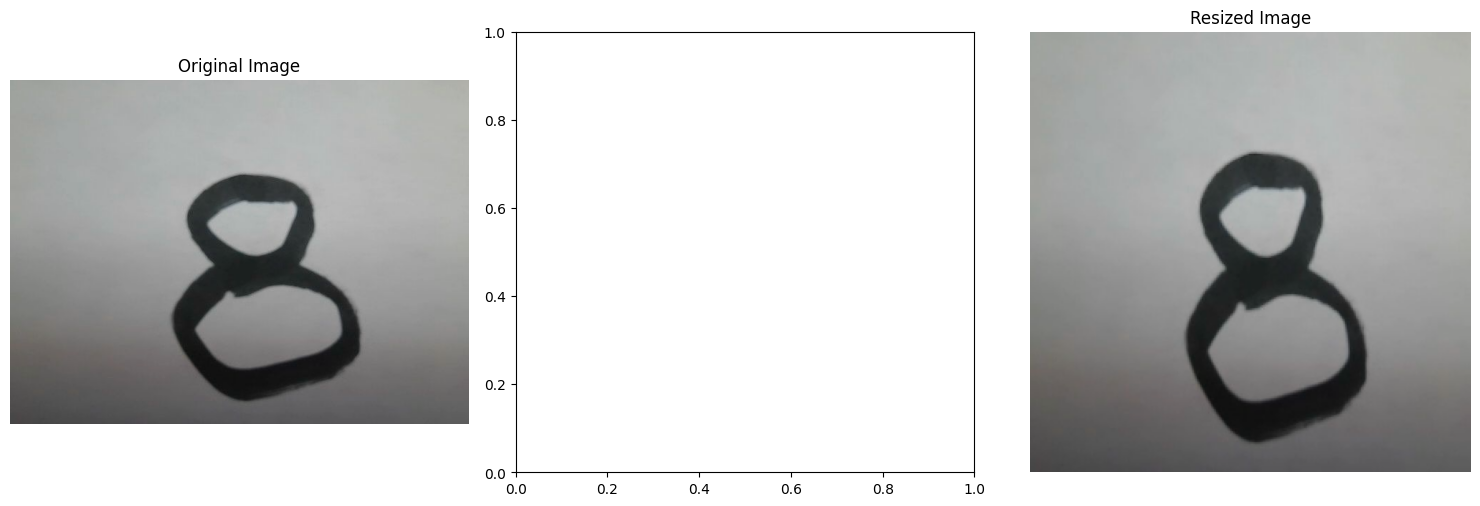

In [24]:
# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [25]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   1.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 6


<IPython.core.display.Javascript object>

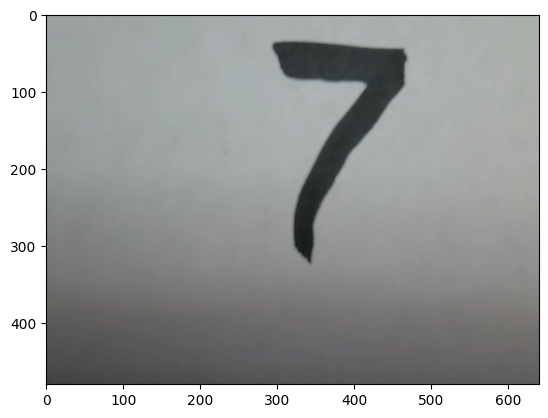

In [26]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

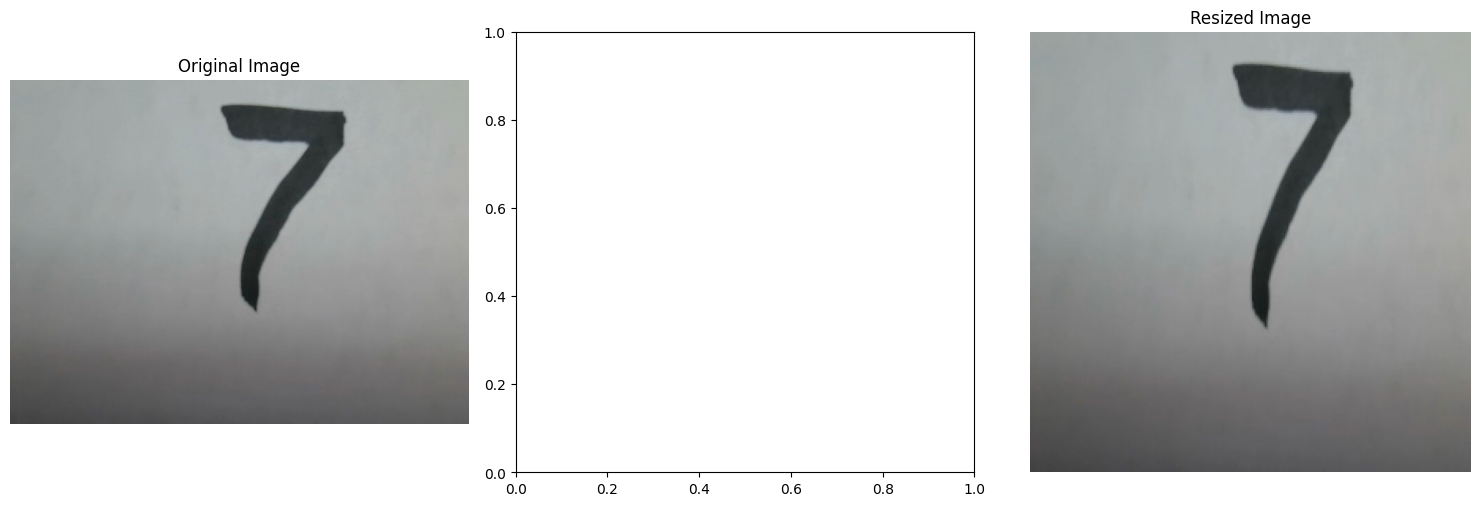

In [27]:
# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [28]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   1.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 7


<IPython.core.display.Javascript object>

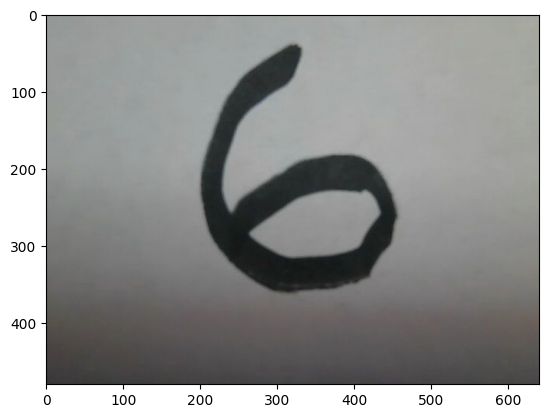

In [29]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

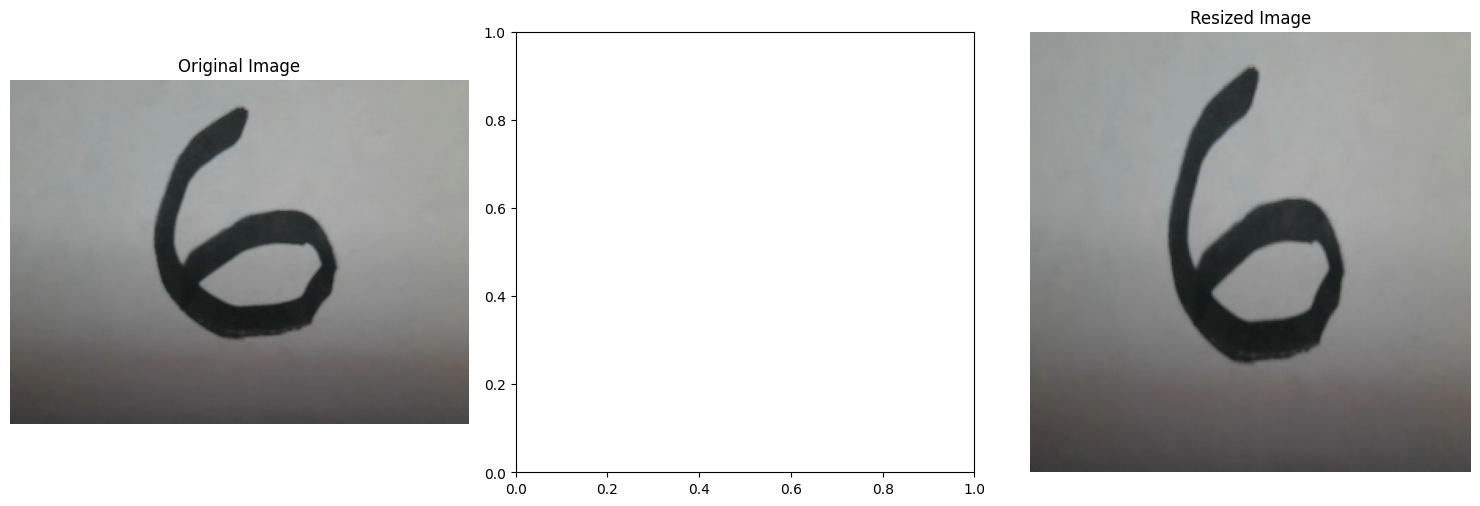

In [30]:
# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [31]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   1.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 6


<IPython.core.display.Javascript object>

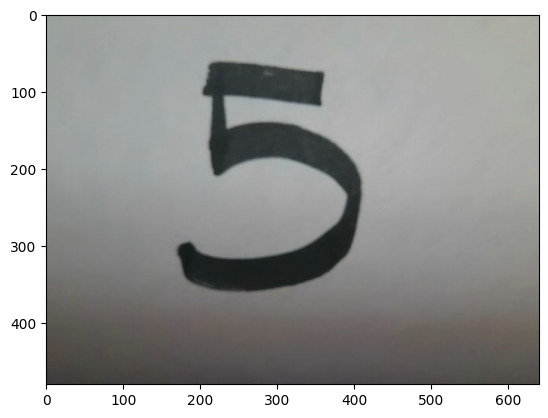

In [32]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

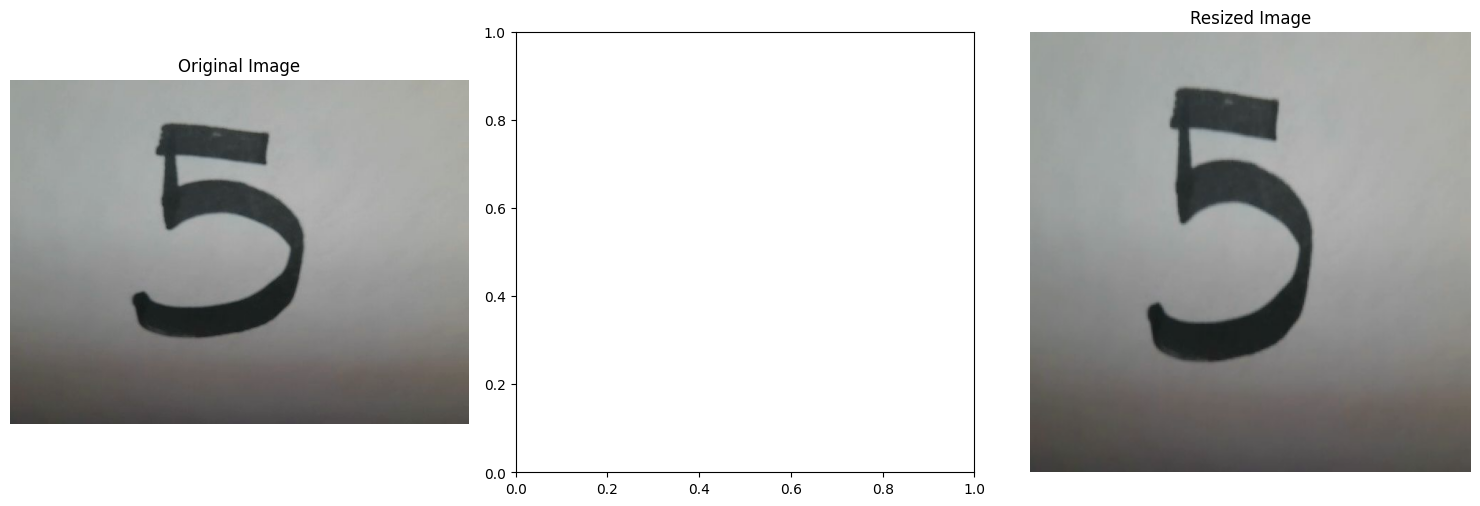

In [33]:
# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [34]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   1.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 5


<IPython.core.display.Javascript object>

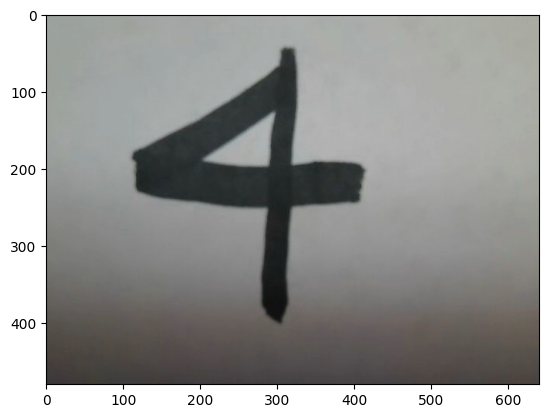

In [38]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

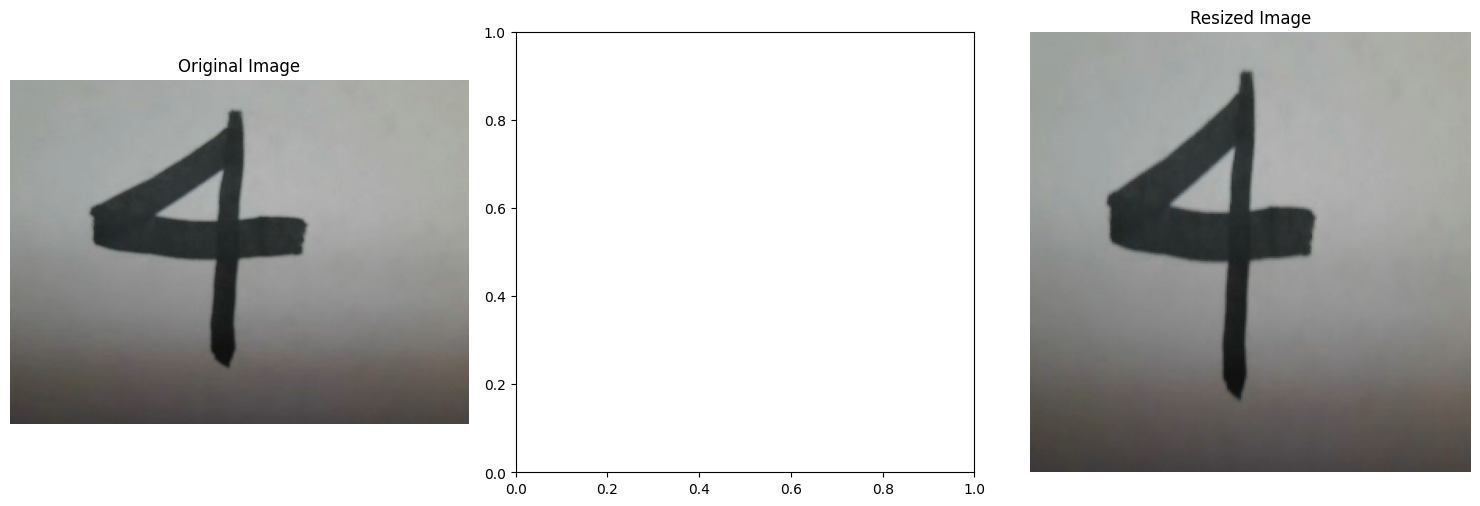

In [39]:
# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [40]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   1.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 4


<IPython.core.display.Javascript object>

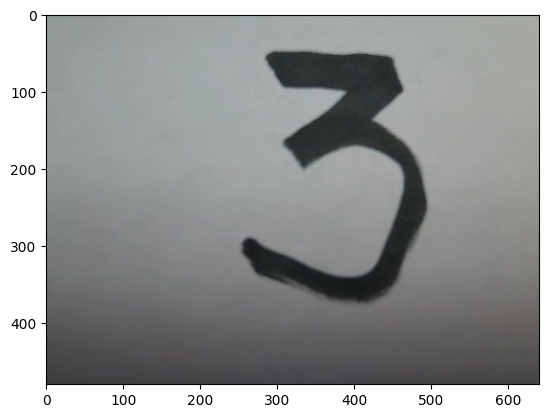

In [41]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

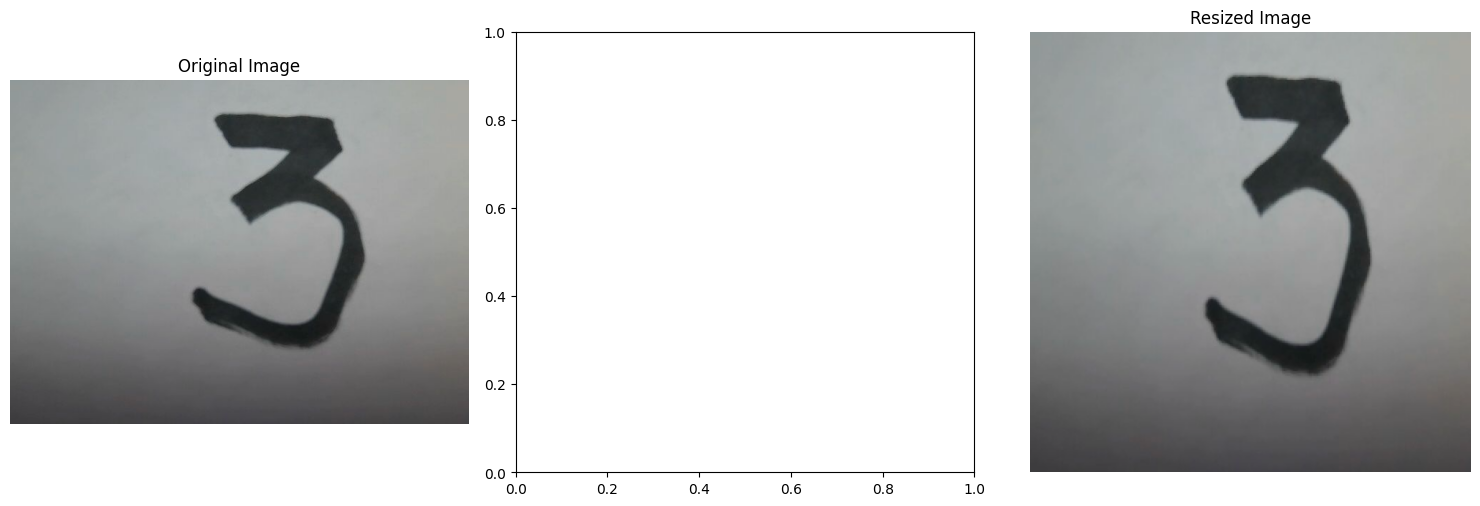

In [42]:
# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [43]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   1.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 3


In [4]:
model = tf.keras.models.load_model("modelo_CNN.h5")

<IPython.core.display.Javascript object>

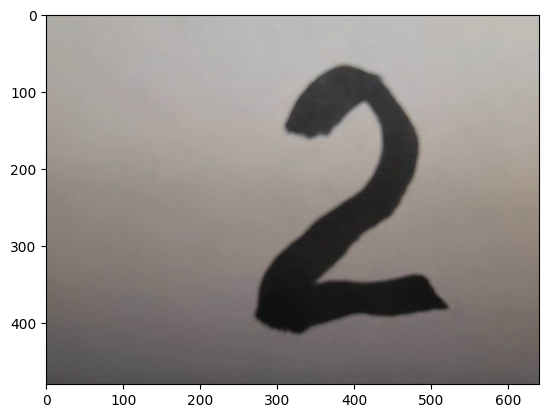

In [5]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

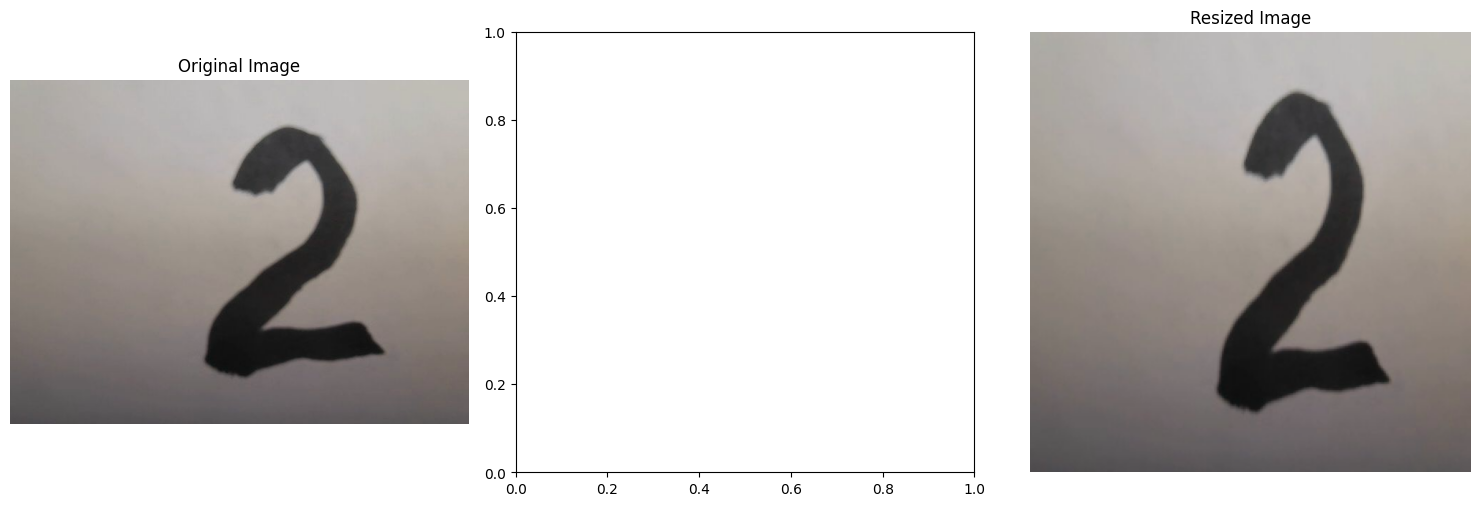

In [6]:
# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   1.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 2


<IPython.core.display.Javascript object>

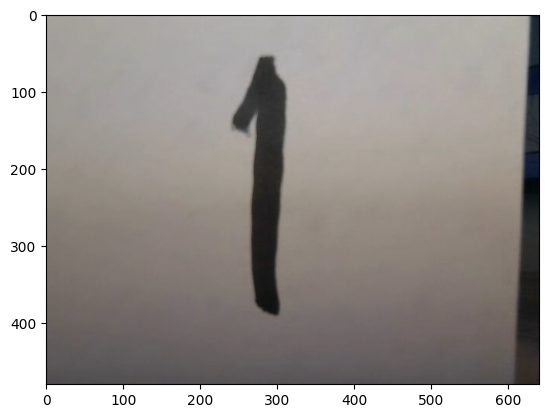

In [8]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

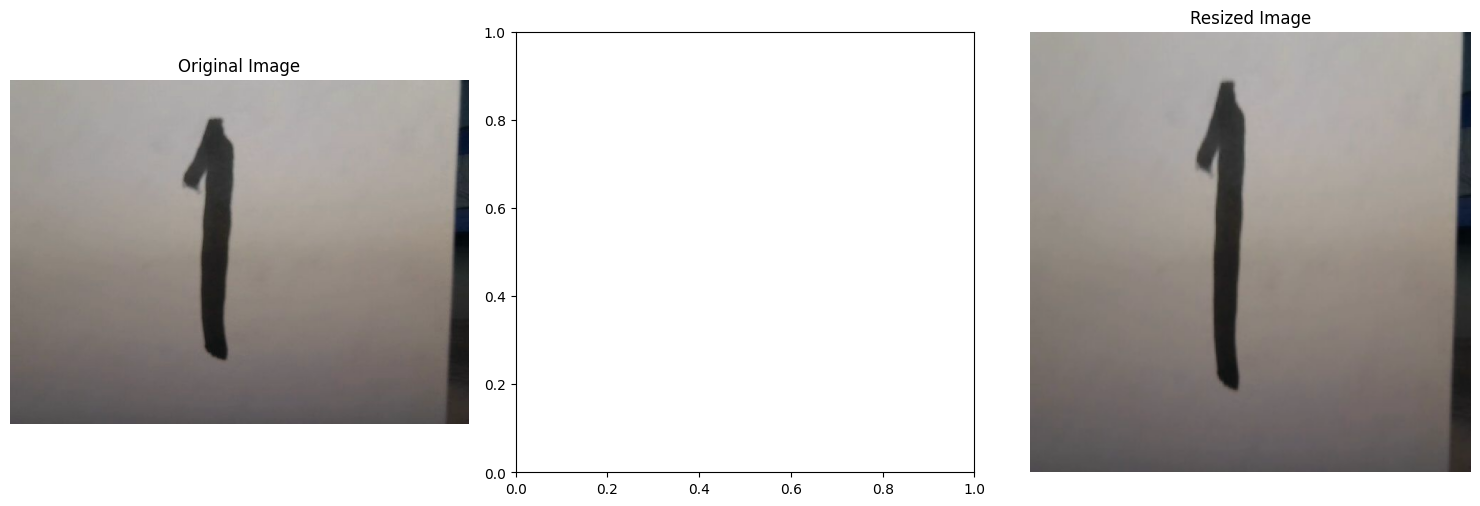

In [9]:
# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   1.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 1


<IPython.core.display.Javascript object>

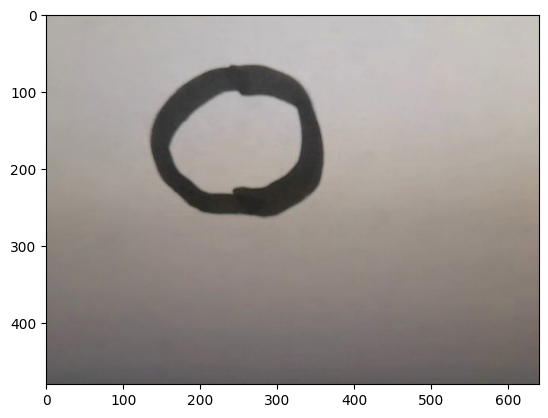

In [11]:
take_photo_2()
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

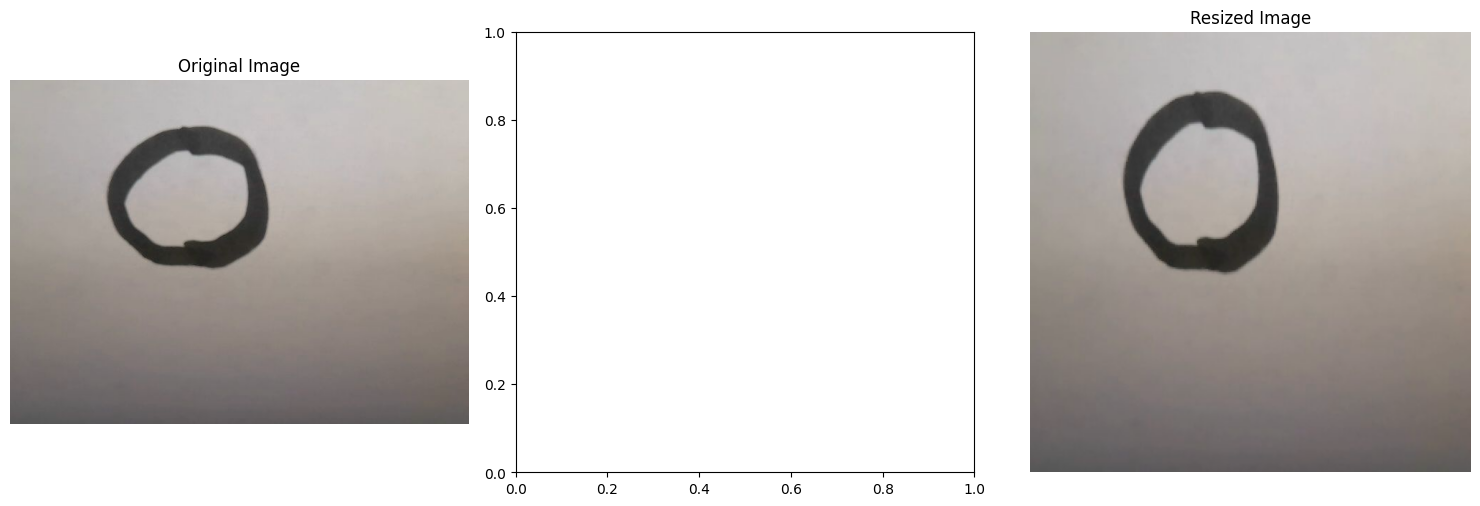

In [13]:
# Load the image
image = cv2.imread('photo.jpg')

 # Thresholding
#_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
#resized = cv2.resize(thresh, (280, 280))
resized = cv2.resize(image, (280, 280))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
#axes[1].imshow(thresh, cmap='gray')
#axes[1].set_title('Thresholded Image')
#axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()

In [14]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 280, 280, 3)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   1.00000
The predicted digit is: 9
